<a href="https://colab.research.google.com/github/dondreojordan/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

#2) Do train/validate/test split with the Tanzania Waterpumps data.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Already split by kaggle into train and test.
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
labels = pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv')
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

#Split into train and val
train, val, =train_test_split(train, train_size=0.80, test_size=.20,
                              stratify=train['status_group'], random_state=42)




train.shape, test.shape, val.shape, test.shape

((47520, 41), (14358, 40), (11880, 41), (14358, 40))

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
'''
More interesting display. Preprocessing Work.
'''
import plotly.express as px

# https://plot.ly/python/mapbox-layers/#base-maps-in-layoutmapboxstyle
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [5]:
train.head()

id  amount_tsh  ... waterpoint_type_group    status_group
43360  72938         0.0  ...    communal standpipe      functional
7263   65358       500.0  ...    communal standpipe      functional
2486     469        25.0  ...             hand pump      functional
313     1298         0.0  ...                 other  non functional
52726  27001         0.0  ...    communal standpipe      functional

[5 rows x 41 columns]

In [6]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    """We need a wrangle function to make the rule repeateable."""
    
    # To Prevent SettingWithCopyWarning
    X = X.copy() #MTo have a fresh dataframe
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0) #Replace Zero values
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude'] #(See cell above)
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns='quantity_group') #Drop duplicates
    
    # return the wrangled dataframe
    return X

#DRY Programming
# DON'T REPEAT YOURSELF
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

#3) Classification Baselines
Metrics and scoring: quantifying the quality of predictions:
https://scikit-learn.org/stable/modules/model_evaluation.html

In [7]:
train['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

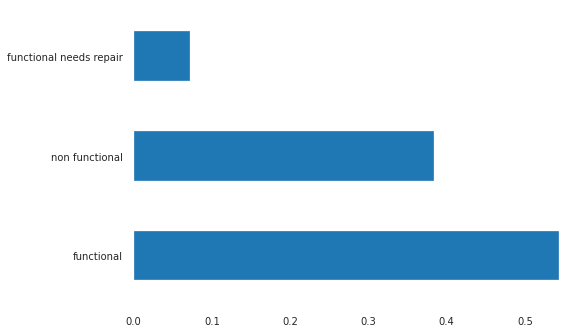

In [8]:
train['status_group'].value_counts(normalize=True).plot(kind='barh')

In [9]:
print(train['status_group'].value_counts(normalize=True),'\n')
print(train['status_group'].value_counts(normalize=False))

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64 

functional                 25807
non functional             18259
functional needs repair     3454
Name: status_group, dtype: int64


#4) & 5) Select features. Get Validation Accuracy Score.
#Use a scikit-learn pipeline to encode categoricals, Impute missing values, Fit a decision tree classifier.

###SciKit-Learn Pipeline to get Validation Accuracy Score

In [10]:
# The status_group column is the target
target = 'status_group' 

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality under fifty (cardinality <= 50)
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [11]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [12]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler() #Scale data that can often improve model performance
model = LogisticRegression(max_iter=1000)

#What you would see outside of a Pipeline
X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model.fit(X_train_scaled, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

Validation Accuracy 0.7308922558922559


In [13]:
print('Training Accuracy', model.score(X_train_scaled, y_train))

Training Accuracy 0.733459595959596


In [14]:
'''No Overfitting Exists'''

'No Overfitting Exists'

#6) Get and Plot feature importances
Get and interpret feature importances of a tree-based model. Feature importance measures how early & often a feature is used for the tree's "branching" decisions.

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_model = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42)
)

dt_model.fit(X_train, y_train);

In [16]:
# Metrics
print('Training Accuracy', dt_model.score(X_train, y_train))
print('Validation Accuracy', dt_model.score(X_val, y_val))

Training Accuracy 0.9954755892255892
Validation Accuracy 0.7594276094276095


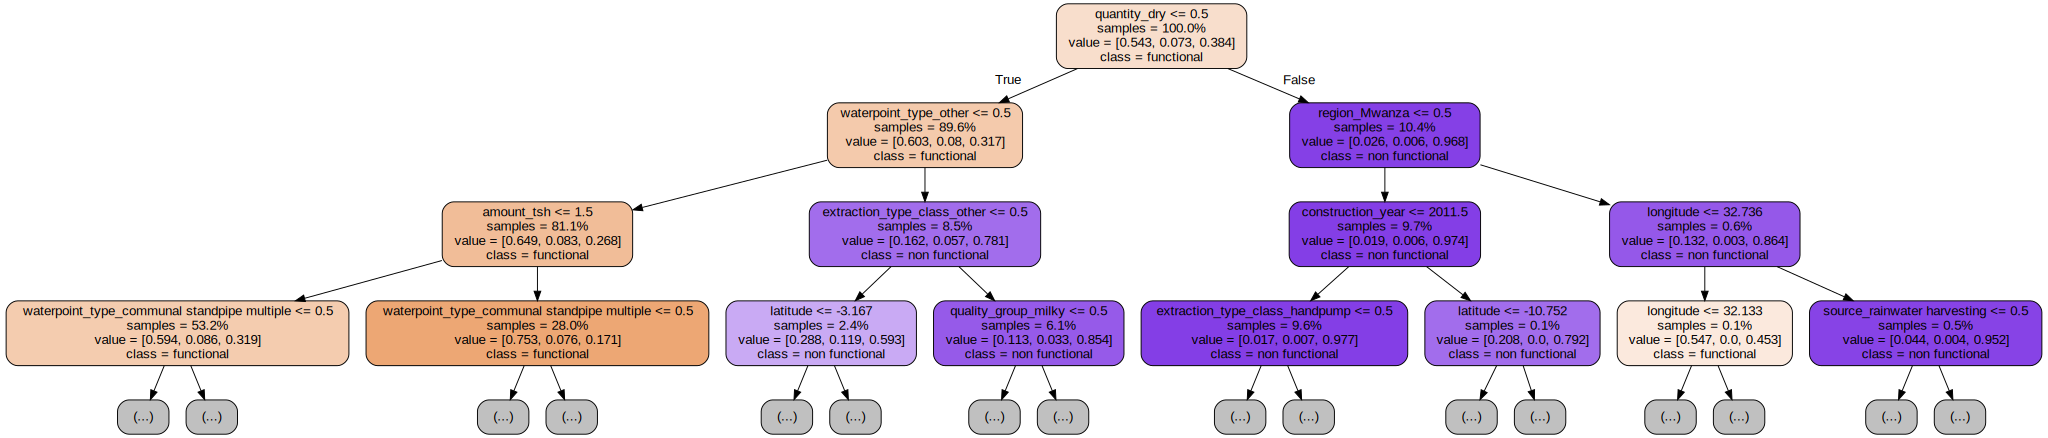

In [17]:
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz
from sklearn.tree import export_graphviz

model = dt_model.named_steps['decisiontreeclassifier']
encoder = dt_model.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

In [18]:
dt_model = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42, max_depth=5)
)

dt_model.fit(X_train, y_train);

In [19]:
# Metrics
print('Training Accuracy', dt_model.score(X_train, y_train))
print('Validation Accuracy', dt_model.score(X_val, y_val))

Training Accuracy 0.7141624579124579
Validation Accuracy 0.7144781144781145


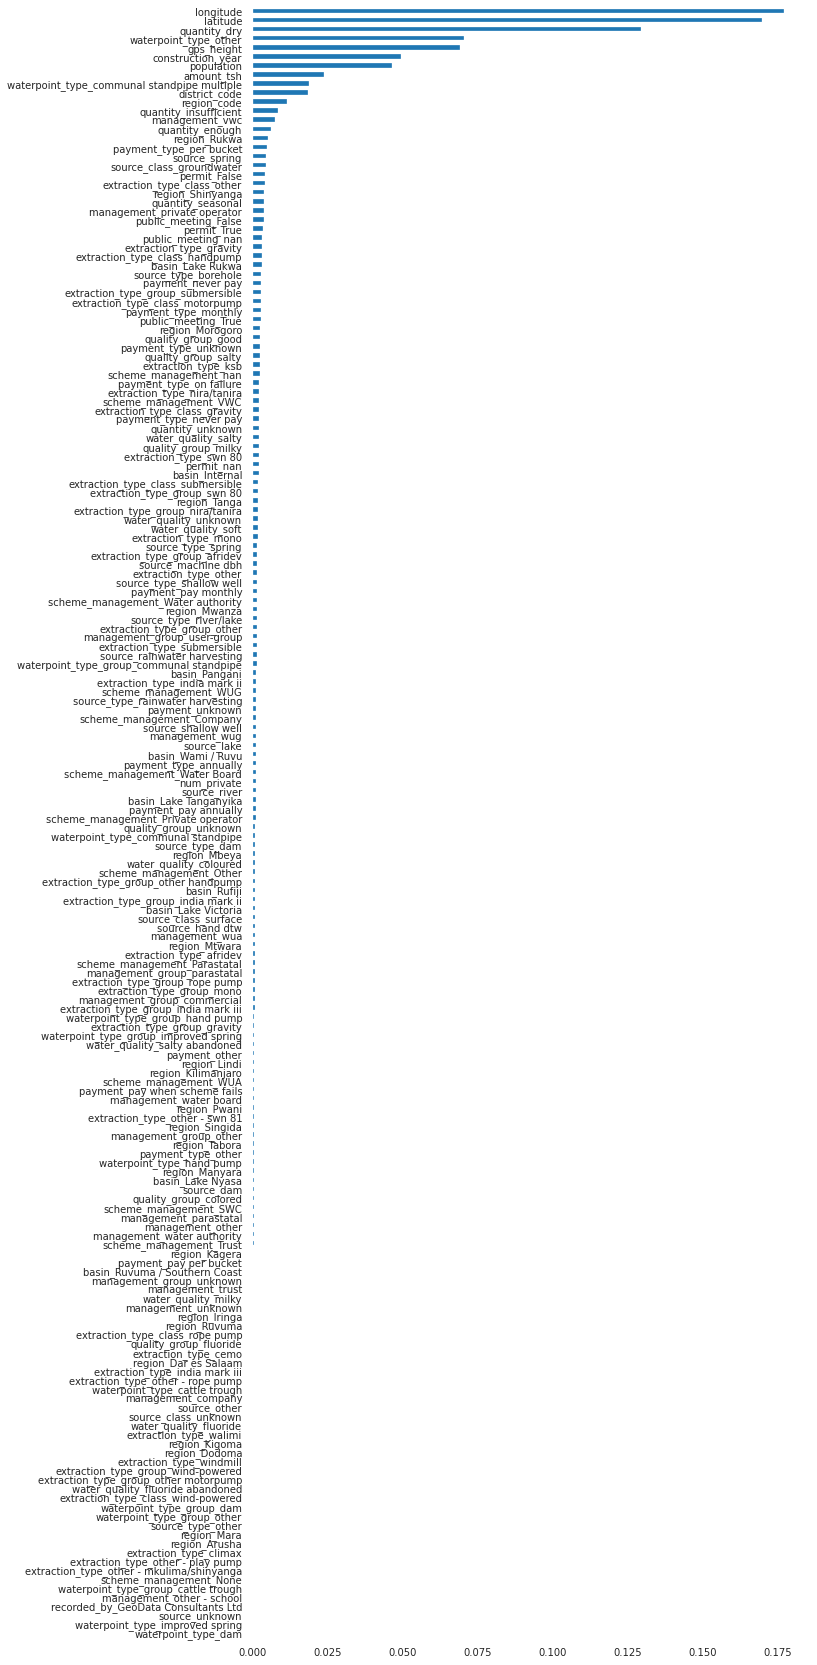

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

encoder = dt_model.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [21]:
imp_series = importances.sort_values(ascending=False)
imp_series

longitude                              0.177182
latitude                               0.169936
quantity_dry                           0.129443
waterpoint_type_other                  0.070546
gps_height                             0.069201
                                         ...   
management_other - school              0.000000
recorded_by_GeoData Consultants Ltd    0.000000
source_unknown                         0.000000
waterpoint_type_improved spring        0.000000
waterpoint_type_dam                    0.000000
Length: 180, dtype: float64

#**BENCHMARK** [] **BENCHMARK** [] **BENCHMARK** [] **BENCHMARK**

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data_feat = train

data_labels = labels
test_feat = test

pd.set_option('display.max_columns', None)

In [36]:
data_feat.head()

id  amount_tsh date_recorded                  funder  gps_height  \
43360  72938         0.0    2011-07-27                     NaN           0   
7263   65358       500.0    2011-03-23               Rc Church        2049   
2486     469        25.0    2011-03-07                   Donor         290   
313     1298         0.0    2011-07-31  Government Of Tanzania           0   
52726  27001         0.0    2011-03-10                   Water           0   

      installer  longitude  latitude             wpt_name  num_private  \
43360       NaN  33.542898 -9.174777         Kwa Mzee Noa            0   
7263       ACRA  34.665760 -9.308548  Kwa Yasinta Ng'Ande            0   
2486         Do  38.238568 -6.179919          Kwasungwini            0   
313         DWE  30.716727 -1.289055           Kwajovin 2            0   
52726      Gove  35.389331 -6.399942                Chama            0   

               basin   subvillage  region  region_code  district_code  \
43360     Lake Nyasa  Mpandapanda   Mbeya           12              4   
7263          Rufiji      Kitichi  Iringa           11              4   
2486     Wami / Ruvu   Kwedigongo   Pwani            6              1   
313    Lake Victoria      Kihanga  Kagera           18              1   
52726       Internal       Mtakuj  Dodoma            1              6   

            lga      ward  population public_meeting              recorded_by  \
43360    Rungwe    Kiwira           0           True  GeoData Consultants Ltd   
7263     Njombe  Imalinyi         175           True  GeoData Consultants Ltd   
2486   Bagamoyo    Mbwewe        2300           True  GeoData Consultants Ltd   
313     Karagwe  Isingiro           0           True  GeoData Consultants Ltd   
52726      Bahi    Nondwa           0           True  GeoData Consultants Ltd   

      scheme_management                  scheme_name permit  \
43360               VWC                            K    NaN   
7263                WUA  Tove Mtwango gravity Scheme   True   
2486                VWC                          NaN  False   
313                 NaN                          NaN   True   
52726               VWC                         Zeje   True   

       construction_year extraction_type extraction_type_group  \
43360                  0         gravity               gravity   
7263                2008         gravity               gravity   
2486                2010   india mark ii         india mark ii   
313                    0           other                 other   
52726                  0            mono                  mono   

      extraction_type_class management management_group         payment  \
43360               gravity        vwc       user-group       never pay   
7263                gravity        wua       user-group     pay monthly   
2486               handpump        vwc       user-group  pay per bucket   
313                   other        vwc       user-group       never pay   
52726             motorpump        vwc       user-group  pay per bucket   

      payment_type water_quality quality_group      quantity        source  \
43360    never pay          soft          good  insufficient        spring   
7263       monthly          soft          good        enough        spring   
2486    per bucket         salty         salty  insufficient  shallow well   
313      never pay          soft          good        enough  shallow well   
52726   per bucket          soft          good        enough   machine dbh   

        source_type source_class     waterpoint_type waterpoint_type_group  \
43360        spring  groundwater  communal standpipe    communal standpipe   
7263         spring  groundwater  communal standpipe    communal standpipe   
2486   shallow well  groundwater           hand pump             hand pump   
313    shallow well  groundwater               other                 other   
52726      borehole  groundwater  communal standpipe    communal standpipe   

     

Left-align the table below instead of centered which is default in Markdown:

In [37]:
%%html
<style>
table {float:left}
</style>

| Column_name   | Description
|:-|:---------------------------------------------------------
| amount_tsh  | Total static head (amount water available to waterpoint)|
| date_recorded | The date the row was entered |
| funder | Who funded the well |
| gps_height | Altitude of the well |
| installer | Organization that installed the well |
| longitude | GPS coordinate |
| latitude | GPS coordinate  |
| wpt_name | Name of the waterpoint if there is one |
| num_private |  N/A |
| basin | Geographic water basin |
| subvillage | Geographic location |
| region | Geographic location |
| region_code | Geographic location (coded) |
| district_code | Geographic location (coded) |
| lga |  Geographic location  |
| ward | Geographic location |
| population | Population around the well |
| public_meeting | True/False |
| recorded_by | Group entering this row of data |
| scheme_management | Who operates the waterpoint |
| scheme_name | Who operates the waterpoint |
| permit | If the waterpoint is permitted |
| construction_year | Year the waterpoint was constructed |
| extraction_type | The kind of extraction the waterpoint uses |
| extraction_type_group | The kind of extraction the waterpoint uses |
| extraction_type_class | The kind of extraction the waterpoint uses  |
| management | How the waterpoint is managed  |
| management_group | How the waterpoint is managed |
| payment | What the water costs |
| payment_type | What the water costs  |
| water_quality | The quality of the water  |
| quality_group | The quality of the water  |
| quantity | The quantity of water |
| quantity_group | The quantity of water  |
| source | The source of the water  |
| source_type | The source of the water  |
| source_class | The source of the water  |
| waterpoint_type | The kind of waterpoint |
| waterpoint_type_group | The kind of waterpoint |

Join the features csv with the labels csv into one training dataframe.

In [38]:
df = data_feat.merge(data_labels, on="id")
df.sample(5)

id  amount_tsh date_recorded    funder  gps_height installer  \
19920   5359      1000.0    2011-02-22     Kalta        1739     Kalta   
19861  32234         0.0    2011-03-18     Water           0     Commu   
27651  21418         0.0    2011-03-07       Dct           0       DCT   
33449    384         0.0    2012-10-15     Rwssp           0    WEDECO   
42640   5905         0.0    2011-03-27  Mwaya Mn         258  Communit   

       longitude  latitude     wpt_name  num_private          basin  \
19920  35.441115 -8.095767         none            0         Rufiji   
19861  36.641243 -6.023216  Kwa Chibuku            0    Wami / Ruvu   
27651  35.849943 -6.361434       Church            0         Rufiji   
33449  34.174208 -3.085412     Makomero            0  Lake Victoria   
42640  36.905888 -7.855153       School            0         Rufiji   

       subvillage     region  region_code  district_code           lga  \
19920     Muwimbi     Iringa           11              1  Iringa Rural   
19861         NaN     Dodoma            1              3        Kongwa   
27651       Elimu     Dodoma            1              4      Chamwino   
33449  Bulyanjemu  Shinyanga           17              6         Meatu   
42640     Shuleni   Morogoro            5              3     Kilombero   

               ward  population public_meeting              recorded_by  \
19920        Ifunda         250           True  GeoData Consultants Ltd   
19861         Njoge           0           True  GeoData Consultants Ltd   
27651  Mvumi Makulu           0           True  GeoData Consultants Ltd   
33449        Kisesa           0           True  GeoData Consultants Ltd   
42640      Mang'ula         300           True  GeoData Consultants Ltd   

      scheme_management scheme_name permit  construction_year extraction_type  \
19920               VWC      Muwimb   True               2004         gravity   
19861               VWC        Many  False                  0            mono   
27651               VWC        MVUM   True                  0     submersible   
33449               WUG        None   True                  0     nira/tanira   
42640               WUA    Mwaya Mn   True               2008         gravity   

      extraction_type_group extraction_type_class management management_group  \
19920               gravity               gravity        vwc       user-group   
19861                  mono             motorpump        vwc       user-group   
27651           submersible           submersible        vwc       user-group   
33449           nira/tanira              handpump        wug       user-group   
42640               gravity               gravity        vwc       user-group   

              payment payment_type water_quality quality_group      quantity  \
19920    pay annually     annually          soft          good        enough   
19861  pay per bucket   per bucket         salty         salty        enough   
27651  pay per bucket   per bucket          soft          good  insufficient   
33449       never pay    never pay          soft          good  insufficient   
42640       never pay    never pay          soft          good      seasonal   

             source   source_type source_class              waterpoint_type  \
19920        spring        spring  groundwater           communal standpipe   
19861   machine dbh      borehole  groundwater  communal standpipe multiple   
27651   machine dbh      borehole  groundwater  communal standpipe multiple   
33449  shallow well  shallow well  groundwater                    hand pump   
42640         river    river/lake      surface           communal standpipe   

      waterpoint_type_group           status_group_x           status_group_y  
19920    communal standpipe               functional               functional  
19861    communal standpipe               functional               functional  
27651    communal standpipe               functional               funct

## Exploratory Data Analysis



In [39]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47520 entries, 0 to 47519
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47520 non-null  int64  
 1   amount_tsh             47520 non-null  float64
 2   date_recorded          47520 non-null  object 
 3   funder                 44616 non-null  object 
 4   gps_height             47520 non-null  int64  
 5   installer              44603 non-null  object 
 6   longitude              46078 non-null  float64
 7   latitude               46078 non-null  float64
 8   wpt_name               47520 non-null  object 
 9   num_private            47520 non-null  int64  
 10  basin                  47520 non-null  object 
 11  subvillage             47234 non-null  object 
 12  region                 47520 non-null  object 
 13  region_code            47520 non-null  int64  
 14  district_code          47520 non-null  int64  
 15  lg

The dataframe contains 41 columns and 59400 rows. There are null-values present in the following features:
* funder (object)
* installer (object)
* subvillage (object)
* public_meeting (object)
* scheme_management (object)
* scheme_name (object)
* permit (object)

All of the features share the same object data type and could indicate a human or equipment error. These features will require further investigation.

The data types for all features are as follows:
* 3 floats
* 7 ints
* 31 objects

The target label is also an object which will slow down our ML models further down the line compared to a category data type. The many objects data types could potentially also be converted into ones that more accurately reflect the data.

In [40]:
# pct of cells with missing values out of all cells
total_cells = np.product(df.shape)
total_missing_values = df.isnull().sum().sum()
pct_missing = (total_missing_values / total_cells * 100)
print("Percentage of cells with null-values: {0:.1f}%".format(pct_missing))

Percentage of cells with null-values: 2.0%


Around 2% of cells contain null-values. However, there may be more null-values but just represented as empty cells, "N/A" strings or something else completely. Let's investigate the values inside features we have already identified as containing null-values.

In [41]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2904
gps_height                   0
installer                 2917
longitude                 1442
latitude                  1442
wpt_name                     0
num_private                  0
basin                        0
subvillage                 286
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2644
recorded_by                  0
scheme_management         3128
scheme_name              22532
permit                    2443
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Exploring categorical features

It appears that the largest concentration of null-values exist in scheme_name which represent who is operating the waterpoints. Perhaps this is indicative of many water pumps not being maintained nor in operation.

In [42]:
print("Funder contains {} unique entities that have funded wells in Tanzania.".format(len(df.funder.unique())))
print("\nCount of each funder in the dataset:\n{}".format(df.funder.value_counts()))

Funder contains 1717 unique entities that have funded wells in Tanzania.

Count of each funder in the dataset:
Government Of Tanzania    7321
Danida                    2491
Hesawa                    1760
Rwssp                     1107
World Bank                1058
                          ... 
British Tanza                1
Mganga                       1
Mbozi Hospital               1
Mbiusa                       1
Gurdians                     1
Name: funder, Length: 1716, dtype: int64


Notice there are 777 observations of "0" likely to represent a null-value. This is in addition to the null-values and would need to be cleaned in the data cleaning section.

In [43]:
print("Installer contains {} unique entities with the name of the organisation that installed the well.".format(len(df.installer.unique())))
print("\nCount of each installer in the dataset:\n{}".format(df.installer.value_counts()))

Installer contains 1930 unique entities with the name of the organisation that installed the well.

Count of each installer in the dataset:
DWE                        13978
Government                  1458
RWE                          960
Commu                        846
DANIDA                       842
                           ...  
Insititutiona                  1
WEEPERS                        1
Mbwiro                         1
Internal Drainage Basin        1
Nassan workers                 1
Name: installer, Length: 1929, dtype: int64


Again, we have 777 counts of "0" highly likely showing that for wells where funder is missing installer also is missing.

In [44]:
print("Subvillage contains {} unique entities with the geographic location of the wells.".format(len(df.subvillage.unique())))
print("\nCount of each subvillage in the dataset:\n{}".format(df.subvillage.value_counts()))

Subvillage contains 17232 unique entities with the geographic location of the wells.

Count of each subvillage in the dataset:
Shuleni     420
Majengo     409
Madukani    404
Kati        306
Mtakuja     211
           ... 
Makokani      1
Bulugala      1
Marudio       1
Korinto       1
Nyere         1
Name: subvillage, Length: 17231, dtype: int64


The values "M", "1" and "I" appear to be null-values but required further analysis before we can determine they truly are missing values or incorrectly entered values due to human error.

In [45]:
print("Public_meeting contains {} unique entities evaluating to either True/False or null-value.".format(len(df.public_meeting.unique())))
print("\nCount of each public_meeting in the dataset:\n{}".format(df.public_meeting.value_counts()))

Public_meeting contains 3 unique entities evaluating to either True/False or null-value.

Count of each public_meeting in the dataset:
True     40838
False     4038
Name: public_meeting, dtype: int64


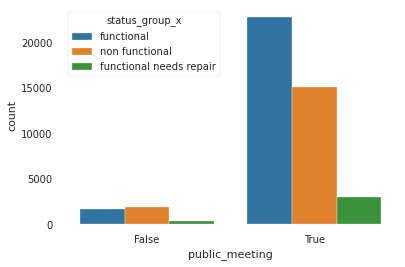

In [46]:
sns.countplot(data=df, x='public_meeting', hue='status_group_x')
sns.set(rc={'figure.figsize':(11.7,8.27)})

It is not clear what public_meeting represents beyond true/false values but there are many more waterpoints that are functional or non-functional that evaluate to True in public_meeting.

In [47]:
print("Scheme_management contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_management.unique())))
print("\nCount of each scheme_management in the dataset:\n{}".format(df.scheme_management.value_counts()))

Scheme_management contains 13 unique entities with the names of who operates the waterpoints.

Count of each scheme_management in the dataset:
VWC                 29470
WUG                  4164
Water authority      2507
WUA                  2334
Water Board          2197
Parastatal           1320
Private operator      836
Company               824
Other                 603
SWC                    78
Trust                  58
None                    1
Name: scheme_management, dtype: int64


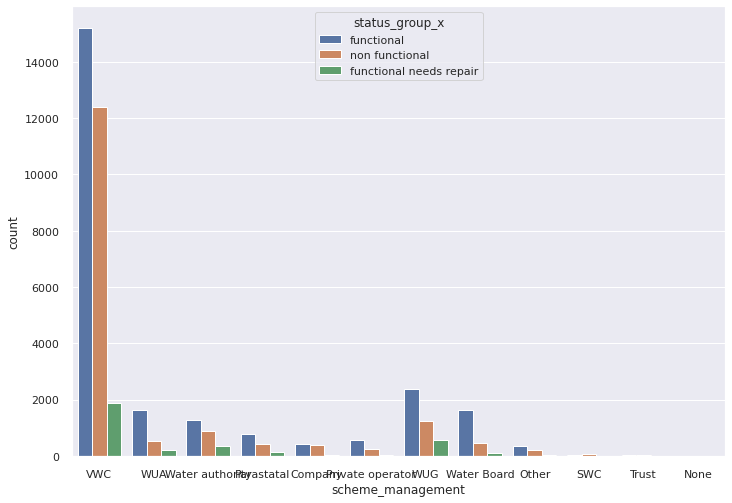

In [48]:
sns.countplot(data=df, x='scheme_management', hue='status_group_x')
sns.set(rc={'figure.figsize':(11.7,8.27)})

While scheme_management and scheme_name appear to have the same column description their values are not identical.

In [49]:
print("Scheme_name contains {} unique entities with the names of who operates the waterpoints.".format(len(df.scheme_name.unique())))
print("\nCount of each scheme_name in the dataset:\n{}".format(df.scheme_name.value_counts()))

Scheme_name contains 2564 unique entities with the names of who operates the waterpoints.

Count of each scheme_name in the dataset:
K                          548
None                       518
Borehole                   435
Chalinze wate              325
M                          322
                          ... 
Longido                      1
Bulamba piped scheme         1
KAIBANJA PUMPING SCHEME      1
MANGISA                      1
Mkutimango water supply      1
Name: scheme_name, Length: 2563, dtype: int64


In [50]:
print("Permit contains {} unique entities indicating whether waterpoints had permits".format(len(df.permit.unique())))
print("\nCount of each permit in the dataset:\n{}".format(df.permit.value_counts()))

Permit contains 3 unique entities indicating whether waterpoints had permits

Count of each permit in the dataset:
True     31071
False    14006
Name: permit, dtype: int64


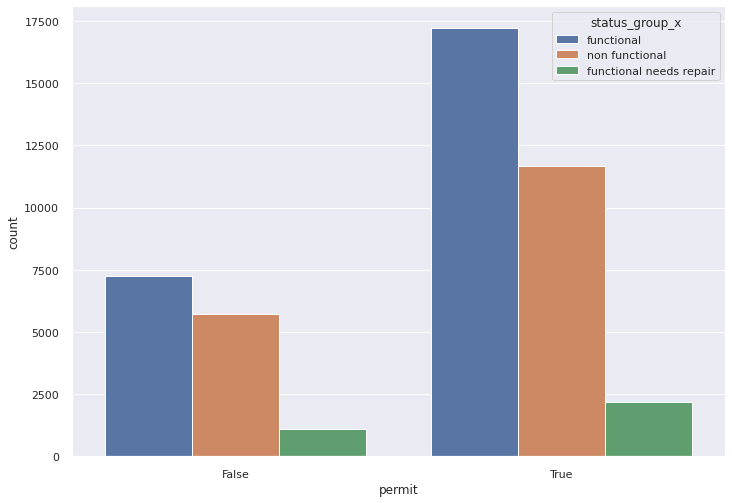

In [51]:
sns.countplot(data=df, x='permit', hue='status_group_x')
sns.set(rc={'figure.figsize':(11.7,8.27)})

The net amount of waterpoints that are functional, non-functional and functional but needs repair are around twice as high for waterpoints that have a permit compared to those that don't. This means we have more data on waterpoints with a permit than those without.

### Exploring numerical features

Let's now explore the numerical features (dtypes ints and floats). They are as follows:
* amount_tsh (amount of water available to the waterpoint)
* gps_height (altitude of the well)
* longtitude (GPS coordinate)
* latitude (GPS coordinate)
* num_private (unknown)
* region_code (geographic location)
* district_code (geographic location)
* population (population around a well)
* construction_year (year the well was constructed)

The amount of water available to a waterpoint could be a proxy for how much a well is used and therefore could be closely correlated with the target labels we are trying to predict.

Amount of water available to the water point values range from 0.0 to 350000.0
Amount of water available distribution of values:  0.0         33265
500.0        2496
50.0         1970
1000.0       1207
20.0         1186
            ...  
138000.0        1
14000.0         1
16000.0         1
4500.0          1
12.0            1
Name: amount_tsh, Length: 94, dtype: int64


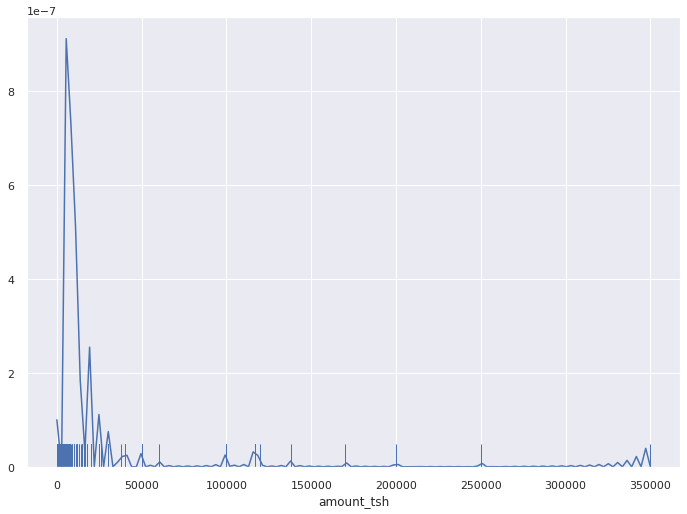

In [52]:
print("Amount of water available to the water point values range from {} to {}".format(df.amount_tsh.min(), df.amount_tsh.max()))
print("Amount of water available distribution of values: ", df.amount_tsh.value_counts())
sns.distplot(df.amount_tsh, hist=False, rug=True, bins=50)

Most of the values in "amount_tsh" range between 0 and 3,000 which means that the water available to pumps is in the lower end of the range through Tanzania.

Population values range from 0 to 15300
Distribution of Populationalue counts:  0       17066
1        5627
200      1553
150      1509
250      1357
        ...  
552         1
1203        1
3250        1
819         1
1439        1
Name: population, Length: 986, dtype: int64


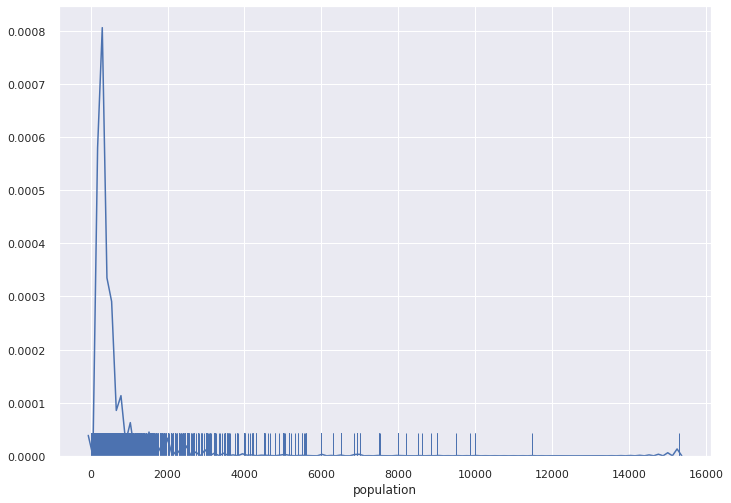

In [53]:
print("Population values range from {} to {}".format(df.population.min(), df.population.max()))
print("Distribution of Populationalue counts: ", df.population.value_counts())
sns.distplot(df.population, hist=False, rug=True, bins=50)


It is clear that "population" is skewed right (positive) with the highest count of populations between 1 nd 5,000 thus indicating we are dealing with extremely small communities around these waterpoints. There are a few population sizes above 30,000 as well. The distplot above indicates that values greater than 10,000 are likely outliers and will need to be cleaned pre-modelling.

In [54]:
df[['population', 'amount_tsh']].corr()

population  amount_tsh
population    1.000000    0.017166
amount_tsh    0.017166    1.000000

Although the distribution of values for both amount_tsh and population look similar they are not at all closely correlated.

### Exploring target labels

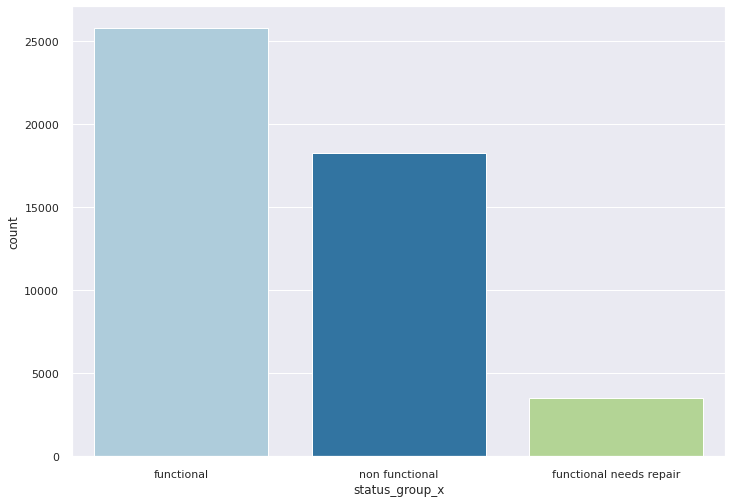

In [55]:
sns.countplot(data=df, x="status_group_x", palette="Paired")


In [56]:
labels_count = df.status_group_x.value_counts()
total_labels = df.status_group_x.count()
(labels_count/total_labels)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group_x, dtype: float64

The target label "functional" accounts for 54% of all labels in the dataset, and "non-functional" for 38%. The only significantly imbalanced class is "functional needs repair" which only accounts for 7% of the data.

### Correlations

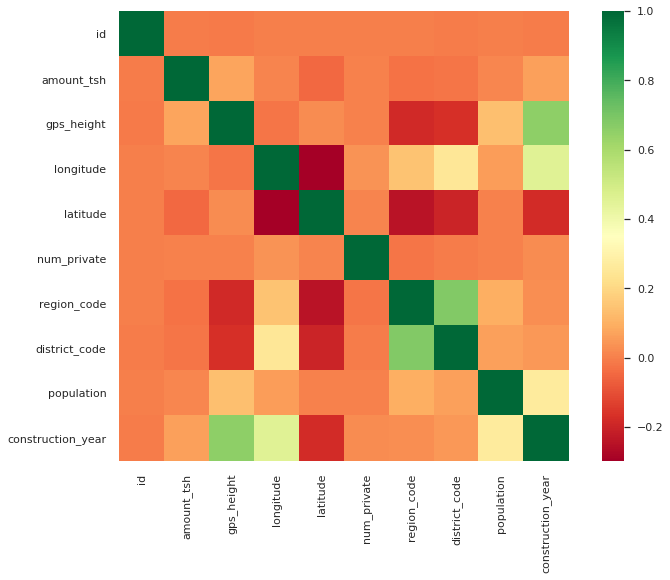

In [57]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

The heatmap shows "construction_year" and "gps_height" have a strong positive correlation. Likewise with "district_code" and "region_code". This indicates that we can potentially drop 2 features whereby reducing the dimensions used to train our model making it simpler and less prone to overfitting. This is due to the fact that when we have two correlated features one feature will explain the variance already and the other is not needed.

Latitude values range from -11.64944018 to -0.99846435.


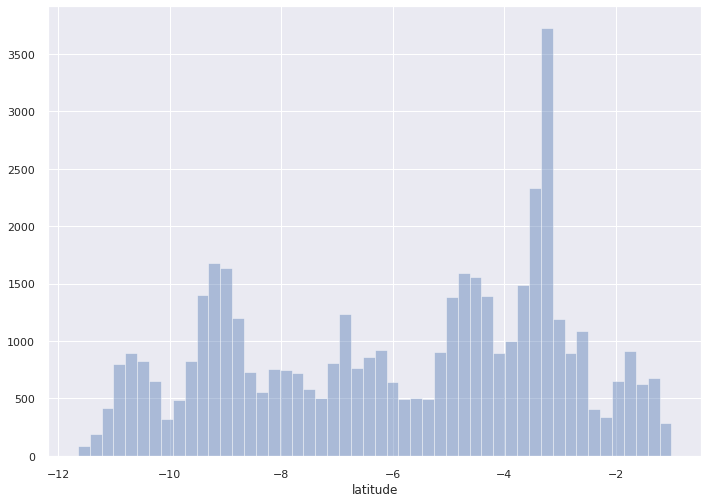

In [58]:
print("Latitude values range from {} to {}.".format(df.latitude.min(), df.latitude.max()))
sns.distplot(df.latitude, kde=False, bins=50, label="Distribution of waterpoints by Latitude")

Longitude values range from 29.6071219 to 40.34430089.


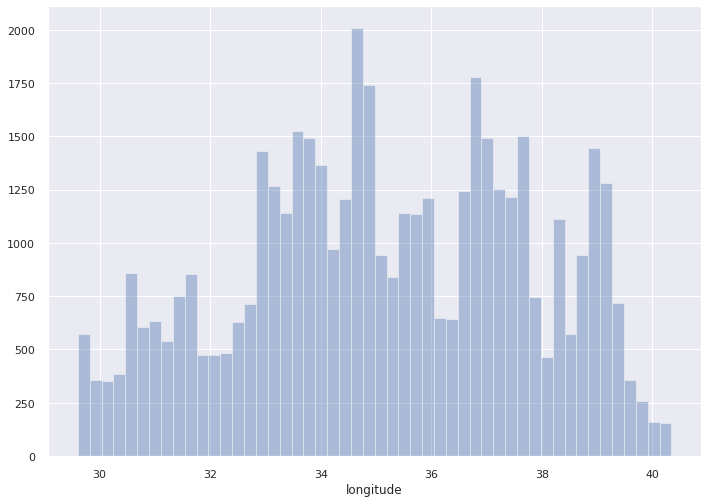

In [59]:
print("Longitude values range from {} to {}.".format(df.longitude.min(), df.longitude.max()))
sns.distplot(df.longitude, kde=False, bins=50, label="Distribution of waterpoints by Longitude")

In [60]:
print ("Distribution of longitude: ", df.longitude.value_counts())

Distribution of longitude:  32.987670    2
37.236326    2
32.924886    2
39.103752    2
32.993683    2
            ..
32.916174    1
37.662371    1
36.925917    1
37.886589    1
35.005922    1
Name: longitude, Length: 46028, dtype: int64


The above visualisation for lat/long shows a negative left skew for longitude which means the data we have for water points are closer to each other horizontally but much more spread vertically. This is bit of information can prove to be interesting once we visualise the datapoints as a scatter plot on a Tanzanian map with the multiclass labels as hue to visualise whether there is a pattern for functional vs. broken down waterpoints.

It is also worth treating the outliers for longitude of 0.0 as they appear to be a clerical error. When plotted against a map it is south of the coast of Ghana.

In [61]:
# Changing dtypes to floats instead of int64
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [62]:
### PLACEHOLDER FOR BASEMAP VIZ ###

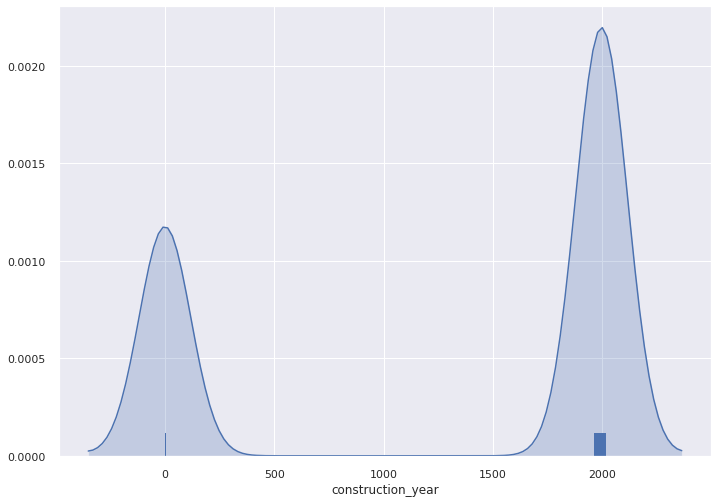

In [63]:
sns.distplot(df['construction_year'],  hist=False,
             rug=True,
             kde_kws={'shade':True})

Missing values in construction_year are likely assigned as 0 and need to be cleaned. 

In [64]:
# Replacing 0 with np.nan in construction_year
df.construction_year.replace(0, np.nan, inplace=True)

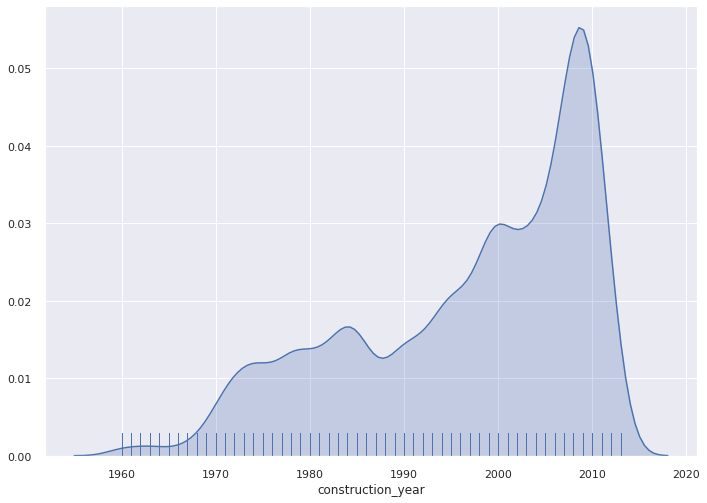

In [65]:
sns.distplot(df.construction_year,  hist=False,
             rug=True,
             kde_kws={'shade':True})

## Data Preprocessing

### Data Cleaning

To-do:
- [x] Convert "date_recorded" into datetime object.
- [x] Convert target label 'status_group' into categorical dtype.
- [x] Convert 0 into np.nan in construction_year
- [x] Merge all English and Swahili terms in wpt_name into English.
- [ ] Convert all objects into categorical dtypes before OHE.
- [ ] Consider converting "0" into most popular category for "funder" and "installer"
- [ ] Compare model performance when removing "M", "1" and "I" in "subvillage" vs. keeping them.
- [ ] Compare model performance when removing "K", "M", "I", "N" and "S" in "scheme_name" vs. keeping them.
- [ ] Values greater than 10,000 in "population" appear to be outliers and needs cleaning.
- [ ] Convert "none" in "wpt_name" into most popular category.
- [ ] Clean the 0.0 in "longitude" values as they appear to be clerical errors.

In [66]:
# Convert date_recorded into a datetime object for further engineering
df['date_recorded'] = pd.to_datetime(df['date_recorded'], infer_datetime_format=True, errors='ignore')

# Convert target feature into categorical to speed up training of the ML models
df['status_group_x'] = df['status_group_x'].astype('category')

### Feature Engineering

In [67]:
# Creating new features from the date_recorded feature representing the date the row was entered into the dataset.
df['year_recorded'] = df['date_recorded'].dt.year
df['month_recorded'] = df['date_recorded'].dt.month 
df['week_of_year_recorded'] = df['date_recorded'].dt.weekofyear
df['day_of_week_recorded'] = df['date_recorded'].dt.dayofweek
df['day_of_year_recorded'] = df['date_recorded'].dt.dayofyear
df['quarter_of_date_recorded'] = df['date_recorded'].dt.quarter


# Transform "construction_year" dtype into int to do operations so we can calculate the years difference 
# from when a waterpoint was constructed and when it was last checked.
df['construction_year'].replace({np.NaN: 0}, inplace=True)
df['construction_year'] = df['construction_year'].astype("int64")
df['age_of_pump'] = df['year_recorded'].values - df['construction_year'].values

# Sanity checking the new features compared to date_recorded
df[['date_recorded',
    'construction_year',
    'year_recorded',  
    'age_of_pump',
    'month_recorded',
    'week_of_year_recorded',
    'day_of_week_recorded',
    'day_of_year_recorded',
    'quarter_of_date_recorded'
   ]].head(10)

date_recorded  construction_year  year_recorded  age_of_pump  \
0    2011-07-27                  0           2011         2011   
1    2011-03-23               2008           2011            3   
2    2011-03-07               2010           2011            1   
3    2011-07-31                  0           2011         2011   
4    2011-03-10                  0           2011         2011   
5    2011-08-07               1986           2011           25   
6    2013-09-03               1995           2013           18   
7    2011-04-17                  0           2011         2011   
8    2011-08-03                  0           2011         2011   
9    2011-08-03                  0           2011         2011   

   month_recorded  week_of_year_recorded  day_of_week_recorded  \
0               7                     30                     2   
1               3                     12                     2   
2               3                     10                     0   
3               7                     30                     6   
4               3                     10                     3   
5               8                     31                     6   
6               9                     36                     1   
7               4                     15                     6   
8               8                     31                     2   
9               8                     31                     2   

   day_of_year_recorded  quarter_of_date_recorded  
0                   208                         3  
1                    82                         1  
2                    66                         1  
3                   212                         3  
4                    69                         1  
5                   219                         3  
6                   246                         3  
7                   107                         2  
8                   215                         3  
9                   215                         3

In [68]:
df['construction_year'].isnull().sum()
df['construction_year'].replace({np.NaN: 0})

0           0
1        2008
2        2010
3           0
4           0
         ... 
47515    2009
47516       0
47517    2012
47518    1988
47519    1982
Name: construction_year, Length: 47520, dtype: int64

In [69]:
df[['date_recorded',
    'year_recorded', 
    'construction_year', 
    'age_of_pump',
    'month_recorded', 
    'week_of_year_recorded',
    'day_of_week_recorded',
    'day_of_year_recorded',
    'quarter_of_date_recorded'
   ]].dtypes

date_recorded               datetime64[ns]
year_recorded                        int64
construction_year                    int64
age_of_pump                          int64
month_recorded                       int64
week_of_year_recorded                int64
day_of_week_recorded                 int64
day_of_year_recorded                 int64
quarter_of_date_recorded             int64
dtype: object

All the new features created off of date_recorded pass the sanity checks and all share the int64 data type. This is important as they are now numerical values required for most machine learning models.

In [70]:
# Dropping date_recorded as we have engineered new features based on it.
df.drop('date_recorded',axis=1, inplace=True, errors='ignore')
df.head()

id  amount_tsh                  funder  gps_height installer  longitude  \
0  72938         0.0                     NaN           0       NaN  33.542898   
1  65358       500.0               Rc Church        2049      ACRA  34.665760   
2    469        25.0                   Donor         290        Do  38.238568   
3   1298         0.0  Government Of Tanzania           0       DWE  30.716727   
4  27001         0.0                   Water           0      Gove  35.389331   

   latitude             wpt_name  num_private          basin   subvillage  \
0 -9.174777         Kwa Mzee Noa            0     Lake Nyasa  Mpandapanda   
1 -9.308548  Kwa Yasinta Ng'Ande            0         Rufiji      Kitichi   
2 -6.179919          Kwasungwini            0    Wami / Ruvu   Kwedigongo   
3 -1.289055           Kwajovin 2            0  Lake Victoria      Kihanga   
4 -6.399942                Chama            0       Internal       Mtakuj   

   region  region_code  district_code       lga      ward  population  \
0   Mbeya           12              4    Rungwe    Kiwira           0   
1  Iringa           11              4    Njombe  Imalinyi         175   
2   Pwani            6              1  Bagamoyo    Mbwewe        2300   
3  Kagera           18              1   Karagwe  Isingiro           0   
4  Dodoma            1              6      Bahi    Nondwa           0   

  public_meeting              recorded_by scheme_management  \
0           True  GeoData Consultants Ltd               VWC   
1           True  GeoData Consultants Ltd               WUA   
2           True  GeoData Consultants Ltd               VWC   
3           True  GeoData Consultants Ltd               NaN   
4           True  GeoData Consultants Ltd               VWC   

                   scheme_name permit  construction_year extraction_type  \
0                            K    NaN                  0         gravity   
1  Tove Mtwango gravity Scheme   True               2008         gravity   
2                          NaN  False               2010   india mark ii   
3                          NaN   True                  0           other   
4                         Zeje   True                  0            mono   

  extraction_type_group extraction_type_class management management_group  \
0               gravity               gravity        vwc       user-group   
1               gravity               gravity        wua       user-group   
2         india mark ii              handpump        vwc       user-group   
3                 other                 other        vwc       user-group   
4                  mono             motorpump        vwc       user-group   

          payment payment_type water_quality quality_group      quantity  \
0       never pay    never pay          soft          good  insufficient   
1     pay monthly      monthly          soft          good        enough   
2  pay per bucket   per bucket         salty         salty  insufficient   
3       never pay    never pay          soft          good        enough   
4  pay per bucket   per bucket          soft          good        enough   

         source   source_type source_class     waterpoint_type  \
0        spring        spring  groundwater  communal standpipe   
1        spring        spring  groundwater  communal standpipe   
2  shallow well  shallow well  groundwater           hand pump   
3  shallow well  shallow well  groundwater               other   
4   machine dbh      borehole  groundwater  communal standpipe   

  waterpoint_type_group  status_group_x  status_group_y  year_recorded  \
0    communal standpipe      functional      functional           2011   
1    communal standpipe      functional      functional           2011   
2             hand pump      functional      functional           2011   
3                 other  non functional  non functional           2011   
4    communal standpipe      functional      functional           2011   

   month_recorded  

We can create an additional feature by doing the following calculation ('amount_tsh' / 'population') which will return the proportion of water available to a waterpoint out of the full population nearby.

In [71]:
df['water_relative_to_pop'] = df['amount_tsh'].values - df['population'].values
print("water relative to population values range: ", df['water_relative_to_pop'].value_counts())

water relative to population values range:   0.0       16501
-1.0        3922
-200.0      1099
-150.0      1027
-250.0       926
           ...  
 9800.0        1
 5874.0        1
-433.0         1
 731.0         1
-1038.0        1
Name: water_relative_to_pop, Length: 2171, dtype: int64


Although there are disproportionately more negative values in the amount of water available out of population nearby this is the reality in Tanzania. Water availability is scarce in Tanzania, in fact according to water.org only 50% of Tanzania's population of 53 million have access to an improved source of safe water. This is the reason why Tanzanians spend a significant amount of time travelling some distance to collect water.

In [72]:
df.dtypes

id                             int64
amount_tsh                   float64
funder                        object
gps_height                     int64
installer                     object
longitude                    float64
latitude                     float64
wpt_name                      object
num_private                    int64
basin                         object
subvillage                    object
region                        object
region_code                    int64
district_code                  int64
lga                           object
ward                          object
population                     int64
public_meeting                object
recorded_by                   object
scheme_management             object
scheme_name                   object
permit                        object
construction_year              int64
extraction_type               object
extraction_type_group         object
extraction_type_class         object
management                    object
m

In [73]:
print ("There are {} unique names out of {} unique waterpoints".format(df['wpt_name'].nunique(), df.shape[0]))
print ("This is because there are many waterpoints that have 'none' as their names as seen here:\n", df['wpt_name'].value_counts())

There are 30661 unique names out of 47520 unique waterpoints
This is because there are many waterpoints that have 'none' as their names as seen here:
 none                        2879
Shuleni                     1416
Zahanati                     675
Msikitini                    424
Kanisani                     253
                            ... 
Kayenjeyenje                   1
Church Mtakatifu Le            1
Mzee Selekete                  1
Kwa Loti Makala                1
Kwa Hanitikisi Kashiriri       1
Name: wpt_name, Length: 30661, dtype: int64


There is another interesting finding when digging deeper into wpt_names. There is a mixture of Swahili and English words which is likely due to that both Swahili and English are the most commonly spoken languages in Tanzania but it makes the data dirty.

1748 of waterpoints share the name Shuleni as seen in wpt_name. According to Google Translate it means 'at school' which probably means that the waterpoint is in proximity to a school. Below is a list of the most frequent names for water wells and their translation into English:
- Shuleni = at school (can potentially be cleaned to be merged with the English "school" below)
- Zahanati = dispensary
- Msikitini = mosque
- Kanisani = church
- Bombani = bomb (?)
- Sokoni = coconut (?)
- Ofisini = office
- School
- Shule Ya Msingi = primary school (can potentially be cleaned to be merged with the English "school")
- Shule = school (can be cleaned to be merged with the English "school")
- Sekondari = secondary (likely referring to secondary school, cleaned and merged with English "school")
- Muungano = in the congregation
- Mkombozi = redeemer (?)
- Madukani = shopping
- Mbugani = wilderness
- Hospital
- Upendo = love (?)
- Kituo Cha Afya = health center
- Mkuyuni = in the snow (?)
- Umoja = unity (?)
- Center
- Ccm (?)
- Kisimani = well
- Ofisi Ya Kijiji = village office
- Mtakuja = you are coming (?)
- Tankini = ?
- Bwawani = sister (?)
- Songambele = ?
- Maendeleo = advancement (?)


In [74]:
# Merging Swahili and English terms into English
lang_mapping = {
    "Shuleni": "School",
    "Shule Ya Msingi": "School",
    "Shule": "School",
    "Sekondari": "School",
    "Kituo Cha Afya":"Center",
}
df['wpt_name'] = df['wpt_name'].replace(lang_mapping)
df.sample(1000)

id  amount_tsh                  funder  gps_height     installer  \
22094  50435         0.0                     Jgb           0           DWE   
29244  22791       500.0                 Caritas         331           DWE   
41307  30836       500.0          Unicef/central        1727           DWE   
7021   57969         0.0                      Dh           0            DH   
40467  63835         0.0                      Ru        1718           DWE   
...      ...         ...                     ...         ...           ...   
16128  68521        30.0                     NaN        1380           NaN   
8916   14581         0.0            World Vision         546  World Vision   
16070  59783         0.0  Government Of Tanzania           1           DWE   
11594  18541         0.0                    Dfid        1448     WATER AID   
7817   54911         0.0                    Tcrs        1581          TCRS   

       longitude  latitude       wpt_name  num_private          basin  \
22094  31.018653 -1.258851  Nyabikulungwa            0  Lake Victoria   
29244  36.414944 -8.654660    Kwa Malunde            0         Rufiji   
41307  34.709304 -9.113866  Kwa Kafyulilo            0         Rufiji   
7021   37.216478 -6.522064   Kwa Kijumige            0    Wami / Ruvu   
40467  31.264640 -7.586275     Mzee Kenya            0     Lake Rukwa   
...          ...       ...            ...          ...            ...   
16128  36.658053 -3.374983  Majengo Chini            0        Pangani   
8916   38.026238 -4.292651     Kwa Hassan            0        Pangani   
16070  39.191760 -8.386073   Kwakibarikio            0         Rufiji   
11594  34.630267 -4.885495          Mkuyu            0       Internal   
7817   37.961406 -4.435655    Kwa Manonge            0        Pangani   

          subvillage       region  region_code  district_code            lga  \
22094     Kankonto C       Kagera           18              1        Karagwe   
29244       Mjengoni     Morogoro            5              4         Ulanga   
41307         Sadani       Iringa           11              4         Njombe   
7021       Msowero B     Morogoro            5              1         Kilosa   
40467       Mabatini        Rukwa           15              3          Nkasi   
...              ...          ...          ...            ...            ...   
16128  Majengo Chini       Arusha            2              3   Arusha Urban   
8916         Mpirani  Kilimanjaro            3              3           Same   
16070     Kinjumbi A        Lindi           80             13          Kilwa   
11594         Mfumbu      Singida           13              4  Singida Urban   
7817         Ngujini  Kilimanjaro            3              3           Same   

            ward  population public_meeting              recorded_by  \
22094     Igurwa           0           True  GeoData Consultants Ltd   
29244      Itete         280           True  GeoData Consultants Ltd   
41307     Mdandu          45           True  GeoData Consultants Ltd   
7021     Msowero         560           True  GeoData Consultants Ltd   
40467      Chala         600          False  GeoData Consultants Ltd   
...          ...         ...            ...                      ...   
16128  Sombetini           1          False  GeoData Consultants Ltd   
8916       Maore         180           True  GeoData Consultants Ltd   
16070   Kinjumbi         253           True  GeoData Consultants Ltd   
11594   Mwankoko           1           True  GeoData Consultants Ltd   
7817   Kirangare         120           True  GeoData Consultants Ltd   

      scheme_management                  scheme_name permit  \
22094               NaN                          NaN   True   
29244       Water Board                     Itete wa   True   
41307               WUA  wanging'ombe water supply s   True   
7021                VWC                           Ms   True   
40467               VWC                          NaN  F

In [75]:
school_strings = []
for string in df['wpt_name']:
    if ('School' in string or 'Shule' in string or 'school' in string or 'shule' in string):
        school_strings.append(string)
print (school_strings)

['Kilimampimbi Shuleni', 'School', 'Lalago Secschool', 'Shule Ya Ilima', 'School', 'School', 'School', 'School', 'School', 'School', 'School', 'Shule Ya Msingi Ipelo', 'School', 'School', 'School', 'School', 'Ipililo A Primary School', 'School', 'School', 'School', 'School', 'School', 'Kazilamihunda Primary School', 'School', 'School', 'Shule Ya Msingi Ihumwa', 'Mwasayi Secschool', 'School', 'Ipililo A Primary School', 'Tank La Shule', 'School', 'School', 'Nkoasenga Primary School', 'Shuleni Sekondari', 'Shule Ya Msingi Mganza', 'Gati La Shuleni', 'Shuleni Mamba', 'School', 'School', 'School', 'Shule Ya Msingi Mikoni', 'Mkolango Primary School', 'Shule Ya Msingi Samwa', 'School', 'Bukigi Primary School', 'School', 'Tank La Shule 2', 'School', 'Leganga Primary School', 'Shule Ya Viziwi Mugeza', 'Shule Ya Msingi Ilalabwe', 'Kurui Primary School 2', 'Shule Ya Sekondari Itwelele', 'School', 'School', 'School', 'School', 'School', 'School', 'School', 'School', 'School', 'School', 'Shule Ya 

It is obvious there are many variations of schools which we should combine into a single 'school' string.

In [76]:
# Merging all string values with same meaning into one string to prepare for one-hot encoding.
df['wpt_name'] = ['School' if 'School' in item 
                  or 'school' in item 
                  or 'Shule' in item
                  or 'Shuleni' in item
                  or 'shuleni' in item
                  or 'shule' in item 
                  or 'secondary' in item
                  or 'Secondary' in item
                  or 'Primary' in item
                  or 'primary' in item
                  else item for item in df['wpt_name']]
df['wpt_name'] = ['For_person' if 'Kwa' in item else item for item in df['wpt_name']]
df['wpt_name'] = ['Church' if 'Church' in item
                  or 'church' in item
                  or 'Kanisani' in item
                  or 'kanisani' in item
                  else item for item in df['wpt_name']]
df['wpt_name'] = ['Mosque' if 'Mosque' in item
                  or 'mosque' in item
                  or 'Msikitini' in item
                  or 'msikitini' in item
                  else item for item in df['wpt_name']]
df['wpt_name'] = ['Medical' if 'Zahanati' in item
                  or 'Hospital' in item
                  or 'hospital' in item
                  or 'Kituo Cha Afya' in item
                  or 'Center' in item
                  or 'Afya' in item
                  else item for item in df['wpt_name']]
df['wpt_name'] = ['Office' if 'Ofisini' in item
                  or 'ofisini' in item
                  or 'Ofisi' in item
                  or 'ofisi' in item
                  or 'Office' in item
                  or 'office' in item
                  else item for item in df['wpt_name']]
print(df.groupby('wpt_name')['status_group_x'].value_counts().sort_values(ascending=False))

wpt_name       status_group_x         
For_person     functional                 9606
               non functional             7646
School         functional                 2326
none           functional                 2131
School         non functional             1687
                                          ... 
Mugwamanzi B   functional                    1
Mugungo        functional needs repair       1
Mugumu Maruko  non functional                1
Mugumu Kioski  functional                    1
A Kulwa        non functional                1
Name: status_group_x, Length: 13964, dtype: int64


In [77]:
# Identify all categorical features
df_objects = df.select_dtypes(include=['object'])
df_objects.columns


# One-hot encode categorical features
# pd.get_dummies(df_objects, drop_first=True, sparse=True)


Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity', 'source',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group_y'],
      dtype='object')

### Dimensionality Reduction

#### Feature Selection

## Hyperparameter Tuning

To-do:
* Compare validation score when dropping either "construction_year" or "gps_height" due to positive correlation.
* Compare validation score when dropping either "district_code" or "region_code" for the same reason.

In [78]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

#**Dondre' After Hours Study Session DS 221 Notes**
Instructor: Keri Kalmbach
```
clean data with outliers and missing values
use scikit-learn pipelines
use scikit-learn for decision trees
get and interpret feature importances of a tree-based model
understand why decision trees are useful to model non-linear, non-monotonic relationships and feature interactions
```

#**Roadmap: Machine Building Workflow**

### [] Wrangle Data
Procedures:

    Define machine learning problem.

    Use in a tidy format to be used in your pipeline.

    For supervised learning problems, divide dataset into feature matrix (x) and target vector(y).

    Divide data into training, validation, and test sets.

###[]Establish Baseline
Goal:

    Establish baseline for performance.

Procedure:

    For classification, find the majority class in your target vector. The will be the baseline for your maopdel's accuracy score
    
    For regression, calculate the error metric for a naive mode. This will be the baseline for your model's MAE or RMSE.

###[]Build Model
Goals:
    Create a pipeline with transformers and predictors that are appropriate to your machine learning problem.

    Fit you model using training data

Procedures:
    Use a pipeline to combine transformers and predictors into a single model

    Choose transformer that you think will improve the model

    Choose a predictor that is appropriate to your machine learning problem

    Common Transformers: SimpleImputer, StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder.
    LinearRegression(Regression) OR LogisticRegression (Classification)

###[]Check Metrics (Validation)
Goal:
    Evaluate performance of your model

Procedure:
    Use appropriate metrics to evaluate your model’s performance. 
    
    Metrics for regression: MAE, RMSE, R2.
    
    Metrics for classification: Accuracy, precision, recall, ROC-AUC.
    
    Compare metrics on training and validation sets to check for overfitting.

###[]Tune Model (Validation)
Goal:
    Improve model performance by adjusting different parts of your model.

Procedure:
    This process is iterative. Adjust your model, refit using your training data, and look at metrics for your training and validation data.

    Be systematic. Keep track of the adjustments you make and how your metrics change.
    
    Try different hyperparameters (use GridSearchCV or RandomizedSearchCV).

    Use feature importance to select or exclude features. 

###[]Communicate Results
Communicate results.



In [79]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

First load and & Split data.

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Already split by kaggle into train and test.
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

#Split into train and val
train, val, =train_test_split(train, train_size=.80, test_size=.20,
                              stratify=train['status_group'], random_state=42)




train.shape, test.shape, val.shape, test.shape

((47520, 41), (14358, 40), (11880, 41), (14358, 40))

In [81]:
train['status_group'].value_counts(normalize=True) # Majority Class with 54% frequency.

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

Use Pandas Profiling to get a report, with warnings about frequent zeros, and much more!

In [82]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile
# What data isn in our dataset (train)

In [83]:
train[['longitude', 'latitude']].describe()
#Lat mean is apprx O. Long mean is apprx. 34. (See graph below)
#Null Island is the green dot at 0,0.

longitude      latitude
count  47520.000000  4.752000e+04
mean      34.082431 -5.705946e+00
std        6.552053  2.941332e+00
min        0.000000 -1.164944e+01
25%       33.092142 -8.528215e+00
50%       34.910740 -5.021436e+00
75%       37.170578 -3.327185e+00
max       40.344301 -2.000000e-08

In [84]:
(train['longitude'] == 0).sum()
# How many instances of Zero. In case you want to know.

1442

In [85]:
import plotly.express as px
px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)

# Null Island = 

###Define a function to wrangle train, validate, and test sets in the same way.
Fix the location, and do more data cleaning and feature engineering.

In [86]:
train.latitude.describe() #Look at the max value being almost Zero

count    4.752000e+04
mean    -5.705946e+00
std      2.941332e+00
min     -1.164944e+01
25%     -8.528215e+00
50%     -5.021436e+00
75%     -3.327185e+00
max     -2.000000e-08
Name: latitude, dtype: float64

In [87]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    """We need a wrangle function to make the rule repeateable."""
    
    # To Prevent SettingWithCopyWarning
    X = X.copy() #MTo have a fresh dataframe
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0) #Replace Zero values
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude'] #(See cell above)
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns='quantity_group') #Drop duplicates
    
    # return the wrangled dataframe
    return X

#DRY Programming
# DON'T REPEAT YOURSELF
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [88]:
'''
Now the locations look better. More representaticve picture.
'''
import plotly.express as px
px.scatter(train, x='longitude', y='latitude', color='status_group', opacity=0.1)

In [89]:
'''
More interesting display. Preprocessing Work.
'''
# https://plot.ly/python/mapbox-layers/#base-maps-in-layoutmapboxstyle
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

###Select Features

In [90]:
# The status_group column is the target
target = 'status_group' 

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality under fifty (cardinality <= 50)
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [91]:
cardinality.sort_values(ascending=False) #Highest Cardinality to Lowest

wpt_name                 30661
subvillage               17231
scheme_name               2563
ward                      2082
installer                 1929
funder                    1716
date_recorded              349
lga                        124
region                      21
extraction_type             18
extraction_type_group       13
scheme_management           12
management                  12
source                      10
basin                        9
water_quality                8
extraction_type_class        7
waterpoint_type              7
source_type                  7
payment                      7
payment_type                 7
waterpoint_type_group        6
quality_group                6
management_group             5
quantity                     5
source_class                 3
permit                       2
public_meeting               2
recorded_by                  1
dtype: int64

In [92]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [93]:
'''
Done and Dusted!!
'''

'\nDone and Dusted!!\n'

#SciKit_Learn Pipeline
    We can combine steps with pipelines: Encode, Impute, Scale, Fit, Predict!

We know our dataset has (1) missing values and (2) categorical features. Given this, what are some transformers that you would recomment?

    SimpleImputer for missing values, OneHotEncoder for categorical features. 

    btw, SelectKBest is a transformer.

In [94]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
imputer = SimpleImputer()
scaler = StandardScaler() #Scale data that can often improve model performance
model = LogisticRegression(max_iter=1000)

#What you would see outside of a Pipeline
X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)
model.fit(X_train_scaled, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

Validation Accuracy 0.7308922558922559


In [95]:
print('Training Accuracy', model.score(X_train_scaled, y_train))

Training Accuracy 0.733459595959596


In [96]:
'''No Overfitting Exists'''

'No Overfitting Exists'

#Plot the Decision Tree

In [97]:
pipe_model = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True, cols=categorical_features), # Can be explicit with which kind of columns
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(n_jobs=-1) # n_jobs speeds up the runtime
)



#Fit our data
pipe_model.fit(X_train, y_train)

#Display Metrics
print('Training Accuracy', pipe_model.score(X_train, y_train))
print('Validation Accuracy', pipe_model.score(X_val, y_val))

Training Accuracy 0.7335227272727273
Validation Accuracy 0.7308080808080808


In [98]:
'''Good Fitting Here. Great!'''

'Good Fitting Here. Great!'

###Get and plot coefficients

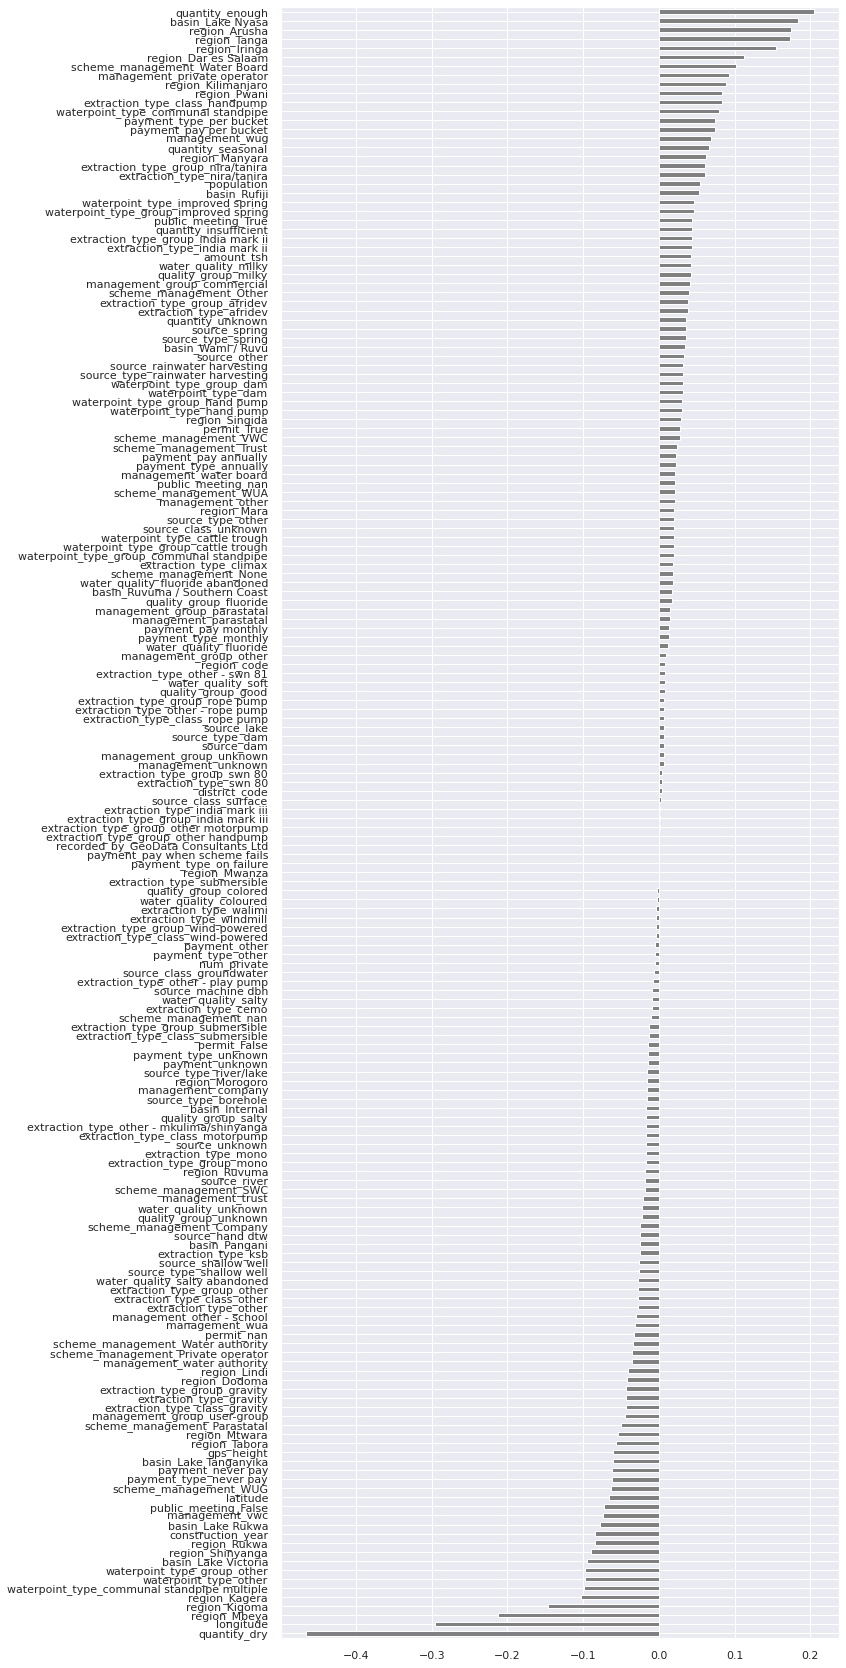

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipe_model.named_steps['logisticregression'] #lowercase section of pipeline. (i.e. 'LogisticRegression' is 'logisticregression')
encoder = pipe_model.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

As we can understand, the middle section does have hig predictive power. May consider dropping them since they don't really help as seenb by the graph.

#Use scikit-learn for decision trees
Decision Trees are prone to "overfitting"

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt_model = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), # Can be explicit with which kind of columns
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42)
)

#Fit model
dt_model.fit(X_train, y_train);

In [101]:
#Metrics
print('Training Accuracy', dt_model.score(X_train, y_train))
print('Validation Accuracy', dt_model.score(X_val, y_val))

Training Accuracy 0.9954755892255892
Validation Accuracy 0.7594276094276095


    Model is being overfit by looking at the variance between training and the validation accuracy.

#Plot the Decision Tree

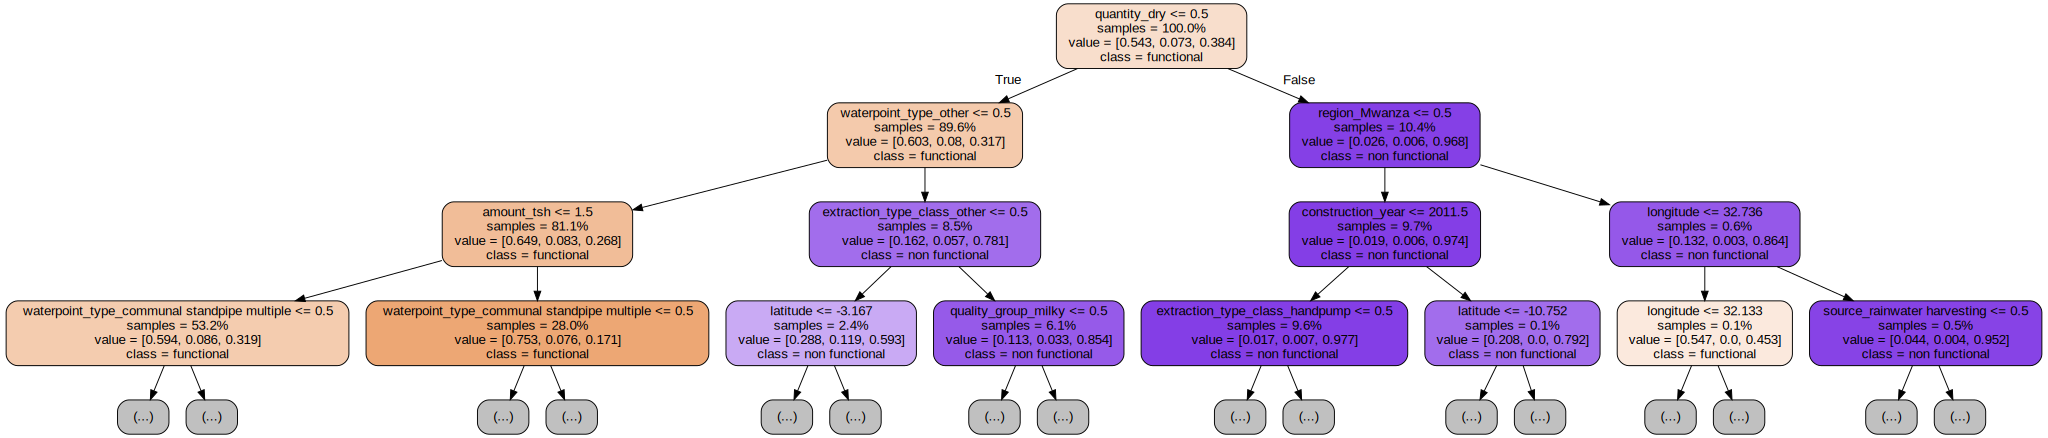

In [102]:
# Plot tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz
from sklearn.tree import export_graphviz

model = dt_model.named_steps['decisiontreeclassifier']
encoder = dt_model.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, 
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

###Reduce complexity of the decision tree

In [103]:
dt_model = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42, max_depth=5)
)

dt_model.fit(X_train, y_train);

In [104]:
# Metrics
print('Training Accuracy', dt_model.score(X_train, y_train))
print('Validation Accuracy', dt_model.score(X_val, y_val))

Training Accuracy 0.7141624579124579
Validation Accuracy 0.7144781144781145


#Get and interpret feature importances of a tree-based model

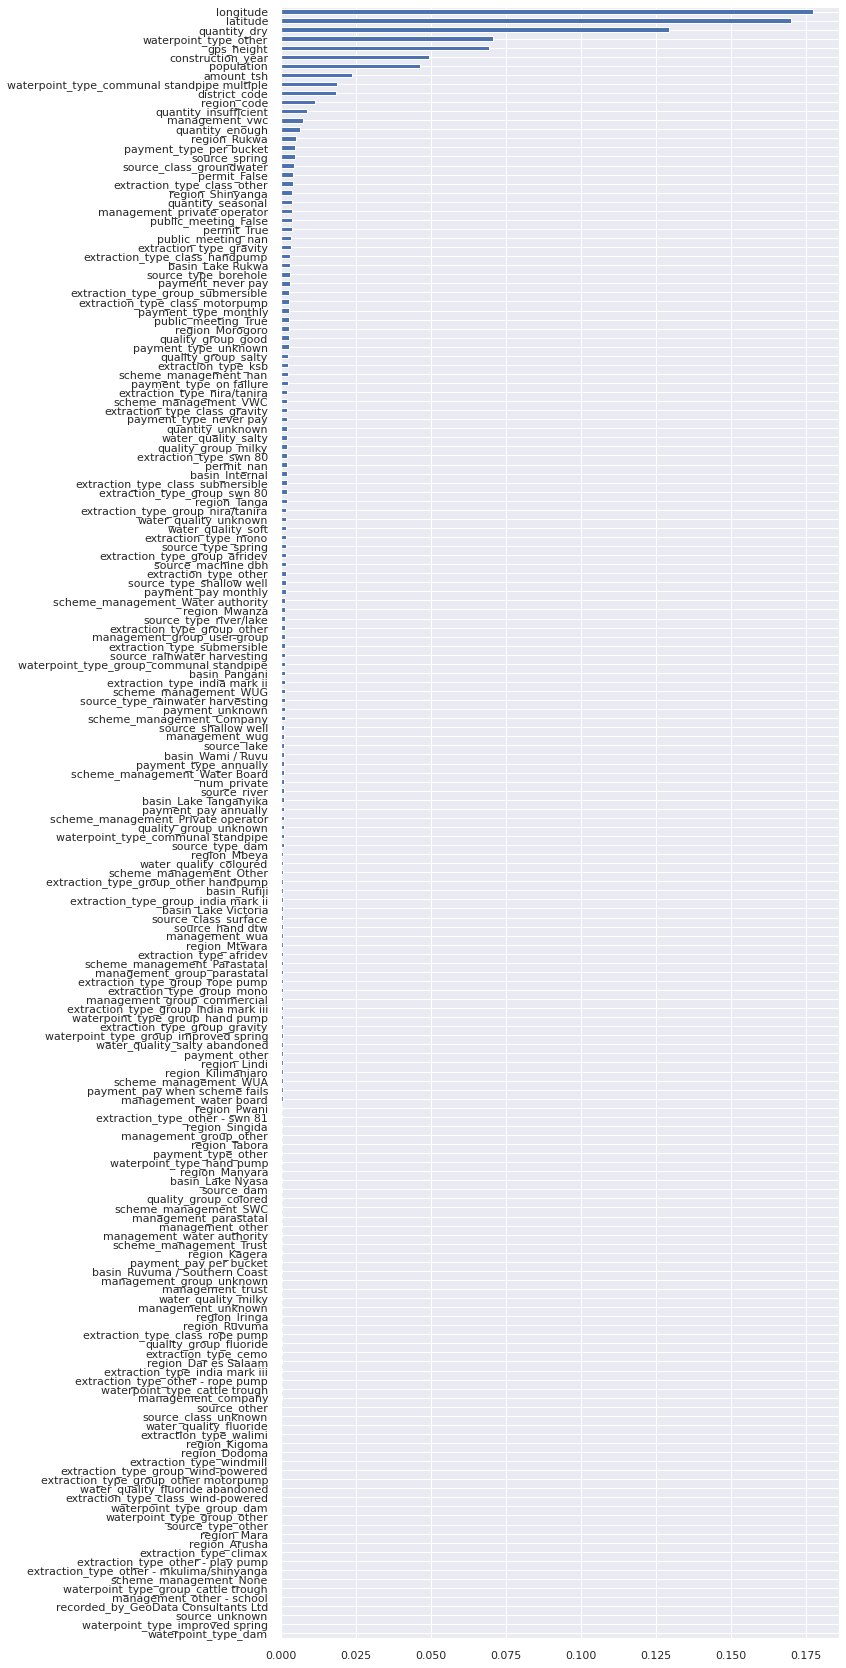

In [105]:
encoder = dt_model.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();
#Sort features in order of iportance from the tree model above.